In [7]:
!git clone https://github.com/ultralytics/ultralytics.git

Cloning into 'ultralytics'...
remote: Enumerating objects: 17125, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 17125 (delta 9), reused 23 (delta 8), pack-reused 17085
Receiving objects: 100% (17125/17125), 9.02 MiB | 20.38 MiB/s, done.
Resolving deltas: 100% (11967/11967), done.


In [8]:
%cd ultralytics

/kaggle/working/ultralytics


In [9]:
!pip install -e '.[dev]'

Obtaining file:///kaggle/working/ultralytics
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 4.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.5/227.5 kB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 59.7 MB/s eta 0:00:00:00:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 77.6 MB/s eta 0:00:00:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 54.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.0/241.0 kB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.7/51.7 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 9.2 MB/s eta 0:00:00
  Cre

In [3]:
!pip install tqdm

In [11]:
# to display images
from IPython.display import Image, clear_output
import torch
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.202 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5016.8/8062.4 GB disk)


In [13]:
# configure .yaml file to guide the model for training
yaml_text = """train: /kaggle/input/traffic-detection-project/train/images
val: /kaggle/input/traffic-detection-project/valid/images
test: /kaggle/input/traffic-detection-project/test/test/images

nc: 5
names: ['bicycle', 'bus', 'car', 'motorbike', 'person']"""

with open("data.yaml", 'w+') as file:
    file.write(yaml_text)

%cat data.yaml

train: /kaggle/input/traffic-detection-project/train/images
val: /kaggle/input/traffic-detection-project/valid/images
test: /kaggle/input/traffic-detection-project/test/test/images

nc: 5
names: ['bicycle', 'bus', 'car', 'motorbike', 'person']

In [14]:
!yolo task=detect mode=train model=yolov8m.pt data=data.yaml epochs=20 imgsz=640 batch=32 project=training_results name=yolov8m_results 

100%|███████████████████████████████████████| 49.7M/49.7M [00:00<00:00, 199MB/s]
Ultralytics YOLOv8.0.202 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=data.yaml, epochs=20, patience=50, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=training_results, name=yolov8m_results, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, cla

In [15]:
import matplotlib.pyplot as plt

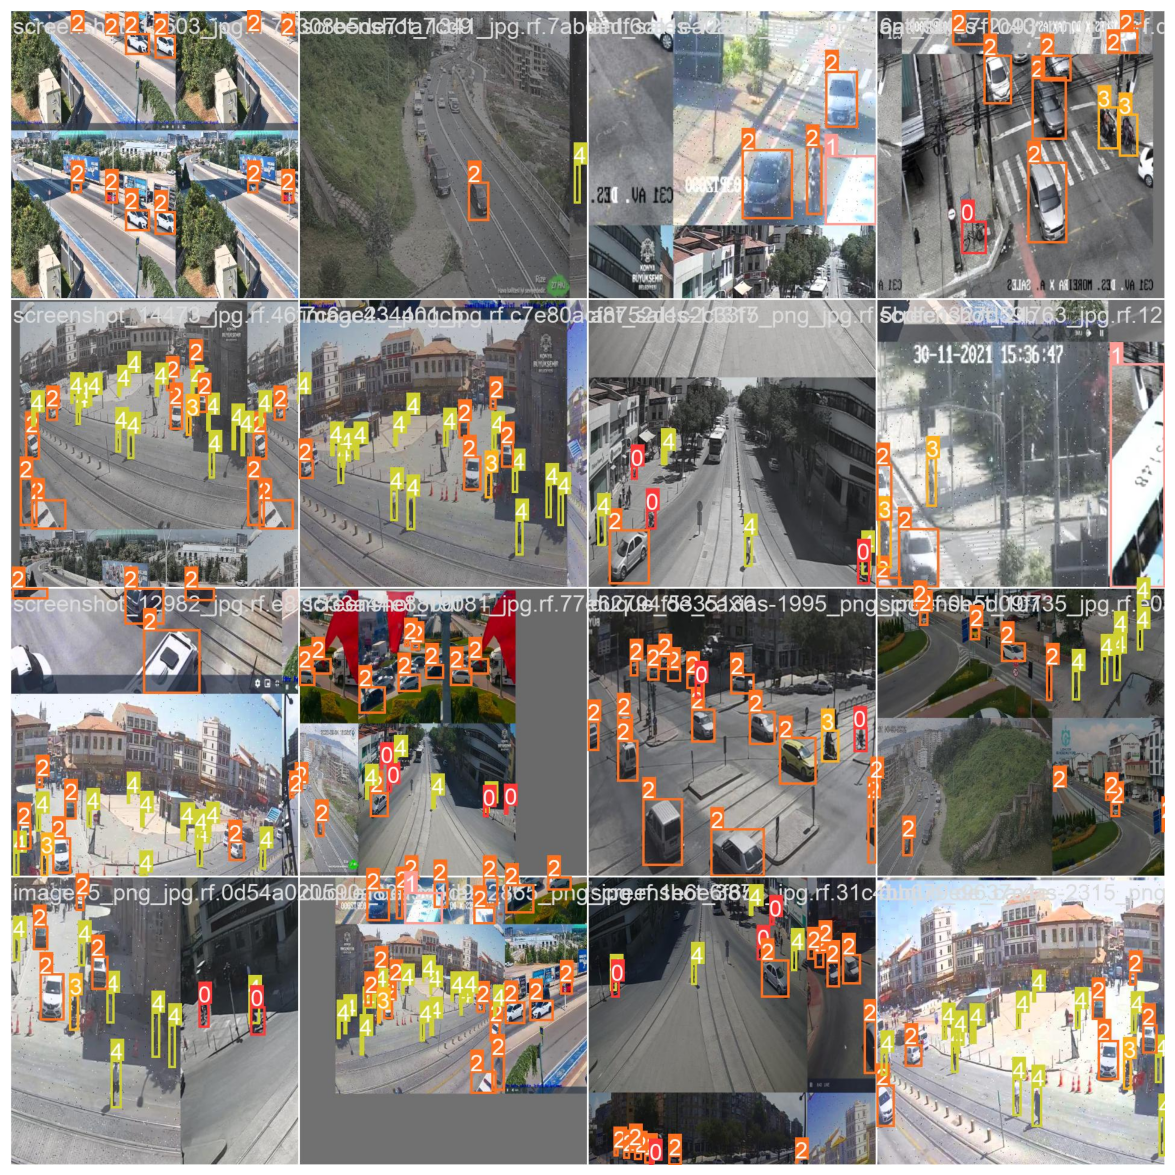

In [18]:
img = plt.imread('/kaggle/working/ultralytics/training_results/yolov8m_results/train_batch0.jpg')
plt.figure(figsize=(20,15))
plt.imshow(img)
plt.axis('off')
plt.show()

In [21]:
!yolo task=detect mode=predict model=/kaggle/working/ultralytics/training_results/yolov8m_results/weights/best.pt conf=0.55 source=/kaggle/input/traffic-detection-project/test/images/

Ultralytics YOLOv8.0.202 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs

image 1/279 /kaggle/input/traffic-detection-project/test/images/aguanambi-1000_png_jpg.rf.7179a0df58ad6448028bc5bc21dca41e.jpg: 640x640 2 bicycles, 13 cars, 1 motorbike, 1 person, 37.1ms
image 2/279 /kaggle/input/traffic-detection-project/test/images/aguanambi-1095_png_jpg.rf.4d9f0370f1c09fb2a1d1666b155911e3.jpg: 640x640 1 bicycle, 14 cars, 3 motorbikes, 37.1ms
image 3/279 /kaggle/input/traffic-detection-project/test/images/aguanambi-1100_png_jpg.rf.8b7574e1c4f3fd7b654c2a693404fd2d.jpg: 640x640 1 bicycle, 12 cars, 3 motorbikes, 37.1ms
image 4/279 /kaggle/input/traffic-detection-project/test/images/aguanambi-1240_png_jpg.rf.7e110b54d205ef0537ddc5dec81a79c2.jpg: 640x640 12 cars, 4 motorbikes, 37.1ms
image 5/279 /kaggle/input/traffic-detection-project/test/images/aguanambi-1540_png_jpg.rf.b8ea6dd9130d82a3b6163bc3aaa823d3.jpg: 6

In [22]:
color_dict = {
    'bicycle': (0, 255, 0),  # màu xanh lá cây
    'bus': (0, 0, 255),      # màu xanh dương
    'car': (255, 0, 0),      # màu đỏ
    'motorbike': (255, 255, 0), # màu vàng
    'person': (0, 255, 255)  # màu xanh lục
}

In [23]:
!ls /kaggle/working/ultralytics/runs/detect/predict

aguanambi-1000_png_jpg.rf.7179a0df58ad6448028bc5bc21dca41e.jpg
aguanambi-1095_png_jpg.rf.4d9f0370f1c09fb2a1d1666b155911e3.jpg
aguanambi-1100_png_jpg.rf.8b7574e1c4f3fd7b654c2a693404fd2d.jpg
aguanambi-1240_png_jpg.rf.7e110b54d205ef0537ddc5dec81a79c2.jpg
aguanambi-1540_png_jpg.rf.b8ea6dd9130d82a3b6163bc3aaa823d3.jpg
aguanambi-1680_png_jpg.rf.fede1a51e422cc8fd628a4846615f65f.jpg
aguanambi-2105_png_jpg.rf.913b43f78d50d1ac51dcf3e43cc7da2b.jpg
aguanambi-2125_png_jpg.rf.7ded3baa4a5760fe91f32e3dc0946b61.jpg
aguanambi-2250_png_jpg.rf.03ef2afb1ddf6d6fb42c62429ebbcea1.jpg
aguanambi-2420_png_jpg.rf.12949ad5e139564e761cd26f2cd07f3c.jpg
aguanambi-2555_png_jpg.rf.e8fe552acc205329ac459d1087eb0637.jpg
aguanambi-2670_png_jpg.rf.1287a75cc98666be54dfa494d7b2bfe8.jpg
aguanambi-2670_png_jpg.rf.60530a426ae98c3e8e6ffcad678cfdae.jpg
aguanambi-2680_png_jpg.rf.305f12470094eb2510b876de1b5f8eb4.jpg
aguanambi-2995_png_jpg.rf.2fa2f60b9d1c1250287a03624c83817b.jpg
aguanambi-3125_png_jpg.rf.c928762f63b976739588cd27f57fc

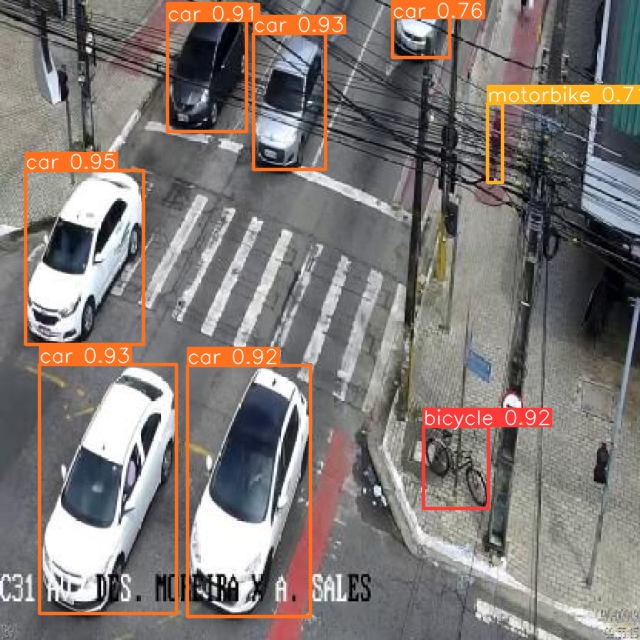

In [24]:
from PIL import Image
from glob import glob
all_path = glob("/kaggle/working/ultralytics/runs/detect/predict/*")
Image.open(all_path[1])

In [25]:
!pip3 install onnx>=1.10.0

In [26]:
!yolo mode=export model=/kaggle/working/ultralytics/training_results/yolov8m_results/weights/best.pt format=onnx

Ultralytics YOLOv8.0.202 🚀 Python-3.10.12 torch-2.0.0 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 218 layers, 25842655 parameters, 0 gradients, 78.7 GFLOPs

PyTorch: starting from '/kaggle/working/ultralytics/training_results/yolov8m_results/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 9, 8400) (49.6 MB)

ONNX: starting export with onnx 1.14.1 opset 17...
================ Diagnostic Run torch.onnx.export version 2.0.0 ================
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================

ONNX: export success ✅ 2.2s, saved as '/kaggle/working/ultralytics/training_results/yolov8m_results/weights/best.onnx' (98.8 MB)

Export complete (5.6s)
Results saved to /kaggle/working/ultralytics/training_results/yolov8m_results/weights
Predict:         yolo predict task=detect model=/kaggle/working/ultralytics/training_results/yolov8m_results/weights/best.onnx imgsz=640  
Validate:        yolo v

In [ ]:
1